# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Reading file

In [2]:
data = pd.read_csv('/kaggle/input/telecom-dataset/Telecom Customers Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data info

In [3]:
data.shape

(7043, 21)

In [4]:
data.iloc[:,:11].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No


In [5]:
data.iloc[:,11:].head()

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df = data.drop(columns=['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Some features have values of 'yes,' 'no,' and 'no phone service.' Since considering 'no phone service' as 'no' does not change accuracy, both 'no' and 'no phone service' are changed to 0.

In [8]:
non_binary_features={'InternetService','Contract','PaymentMethod'}
for feature in non_binary_features:
    print(df[feature].unique())

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['DSL' 'Fiber optic' 'No']


# Data cleaning

In [9]:
internet_LE = LabelEncoder()
df.InternetService = internet_LE.fit_transform(df.InternetService)

contract_LE = LabelEncoder()
df.Contract = contract_LE.fit_transform(df.Contract)

payment_LE = LabelEncoder()
df.PaymentMethod = payment_LE.fit_transform(df.PaymentMethod)

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,0,No,Yes,No,No,No,No,0,Yes,2,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,0,Yes,No,Yes,No,No,No,1,No,3,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,0,Yes,No,Yes,Yes,No,No,1,No,0,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,1,No,No,No,No,No,No,0,Yes,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,1,Yes,3,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,1,Yes,1,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,0,Yes,No,No,No,No,No,0,Yes,2,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,1,No,No,No,No,No,No,0,Yes,3,74.40,306.6,Yes


In [10]:
df['gender'] = df['gender'].apply(lambda x: 1 if str(x).strip().lower() == 'male' else 0)
def to_binary(col):
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)
convert_binary_features = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for feature in convert_binary_features:
    to_binary(feature)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [11]:
#converting datatype from object to numerical

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Data visualization

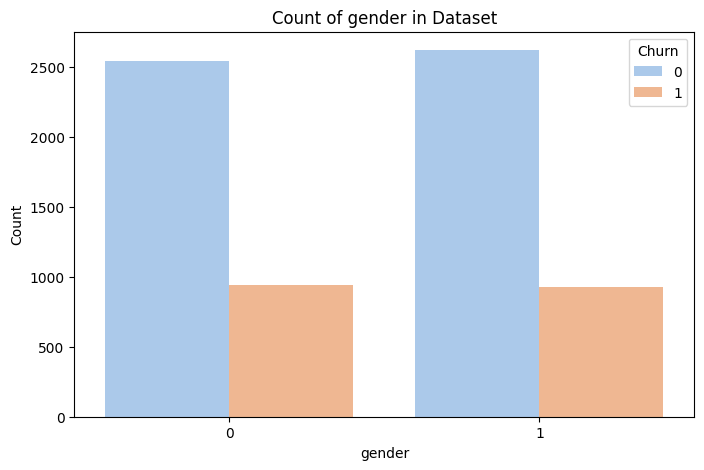

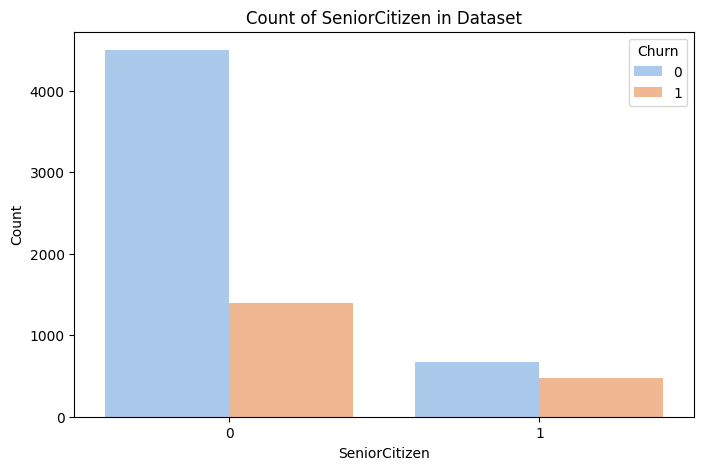

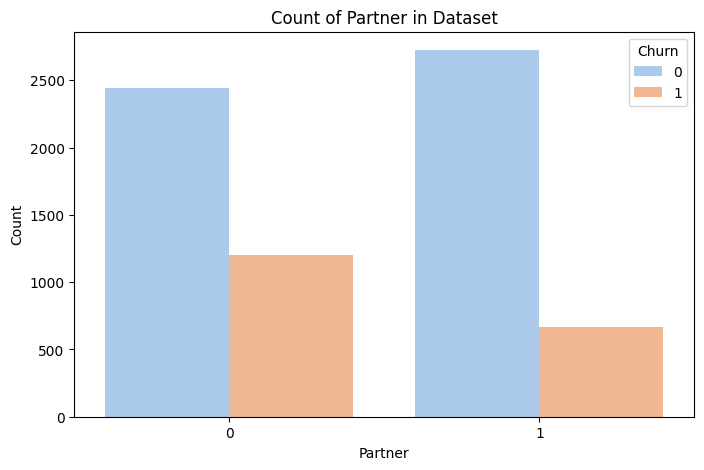

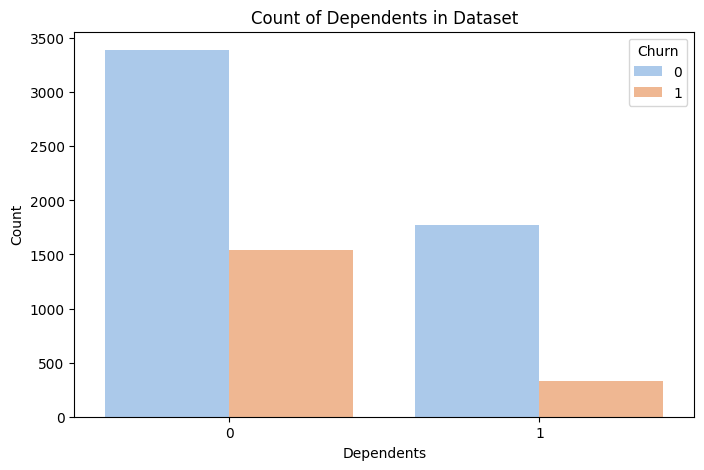

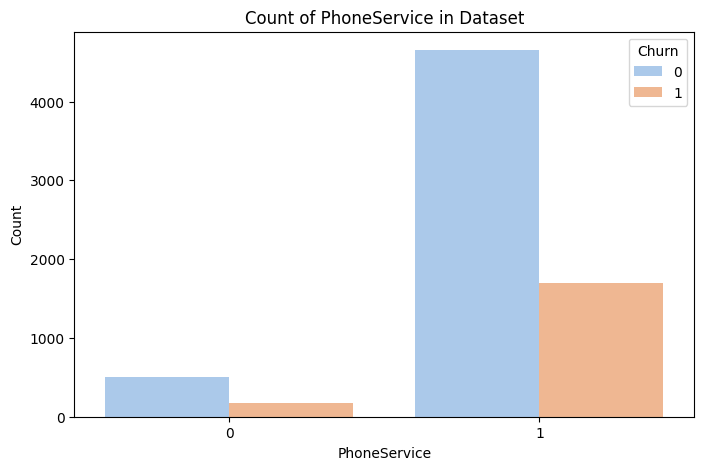

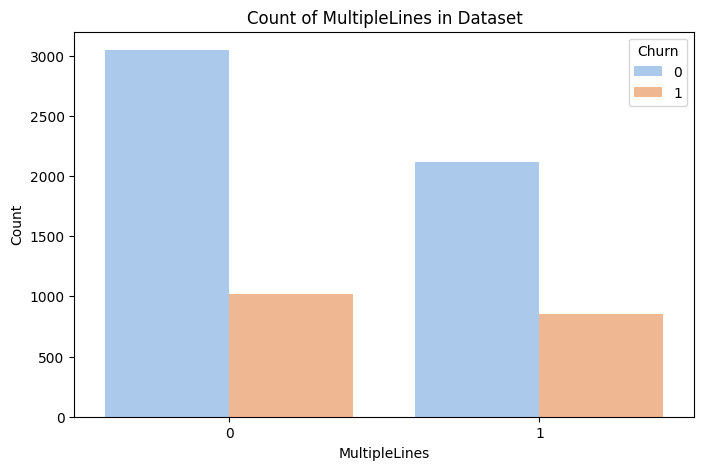

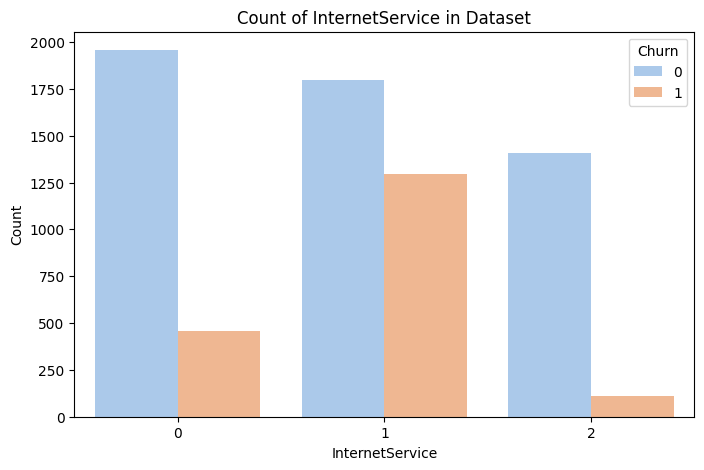

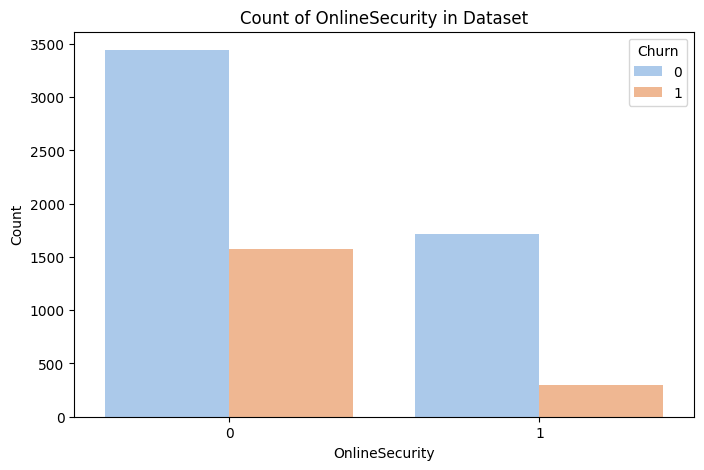

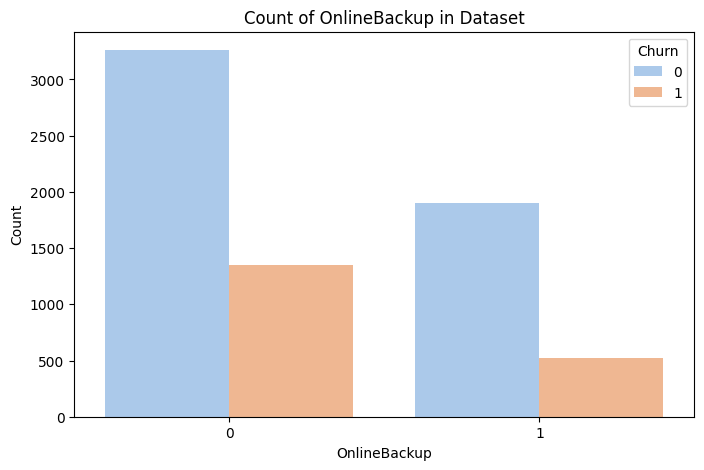

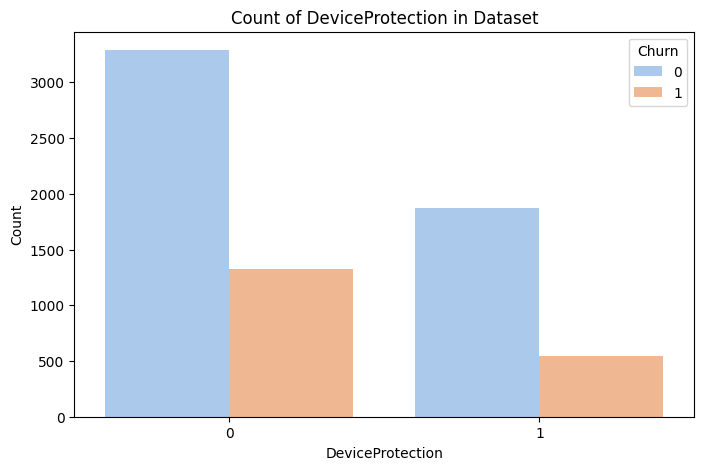

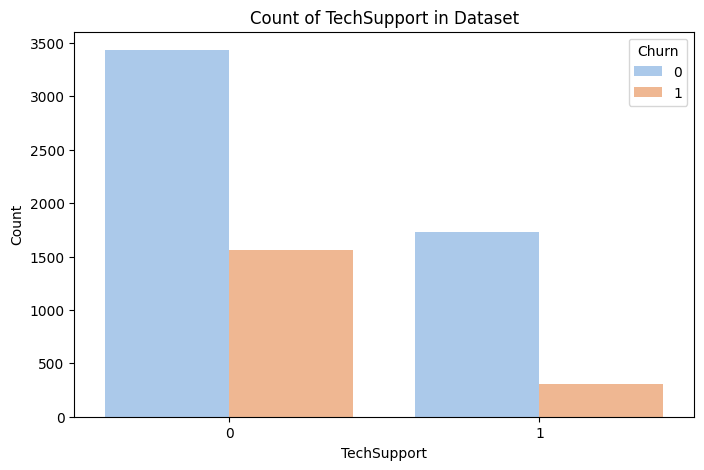

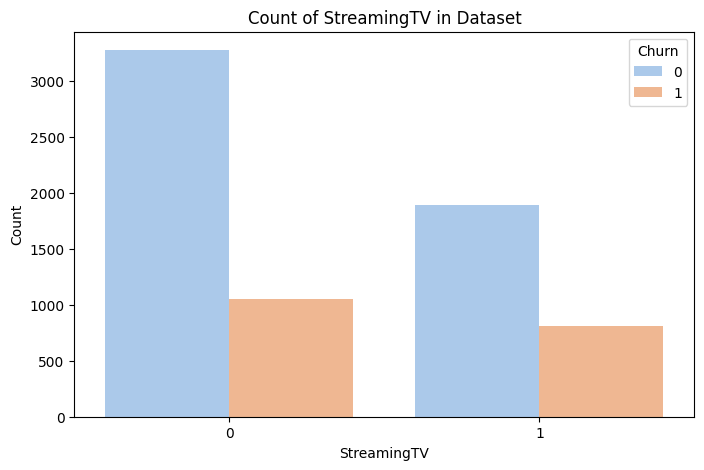

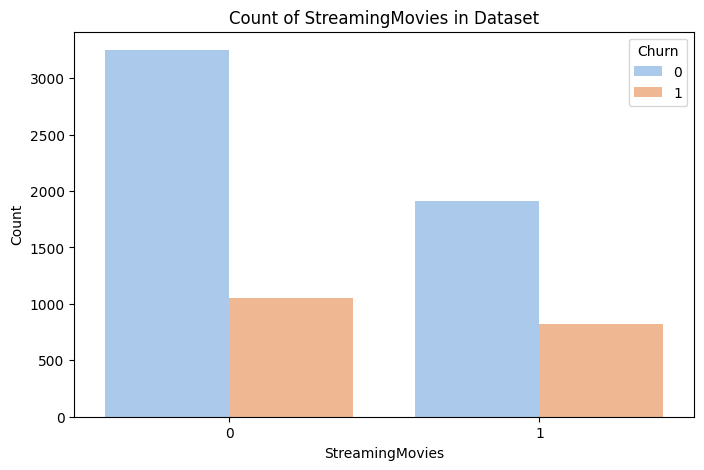

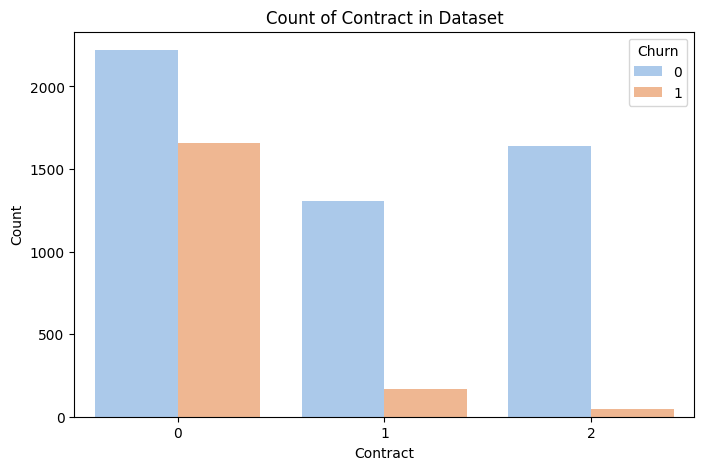

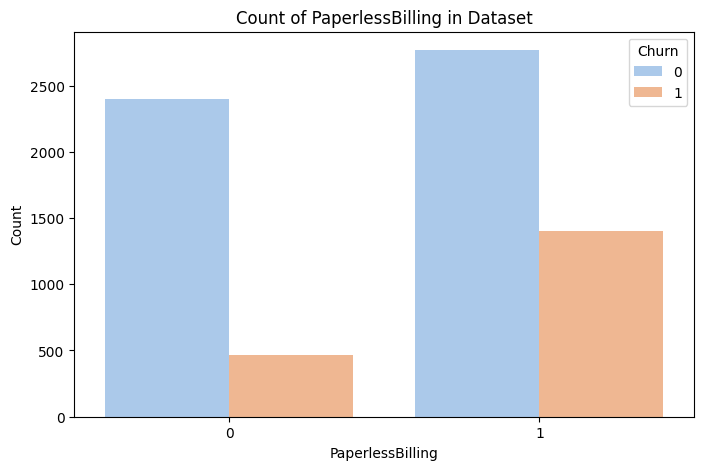

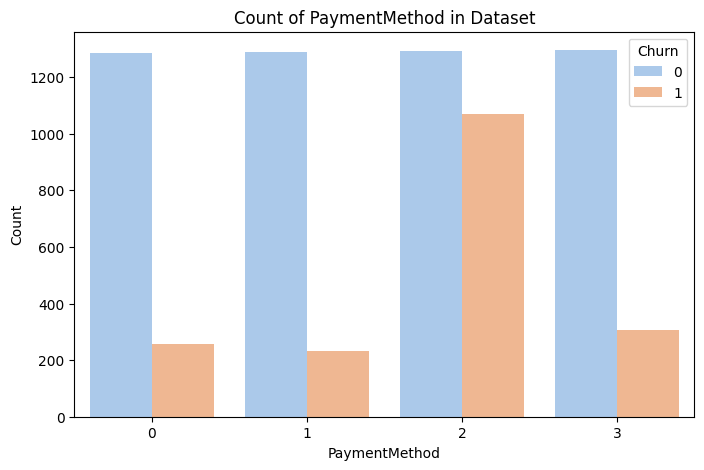

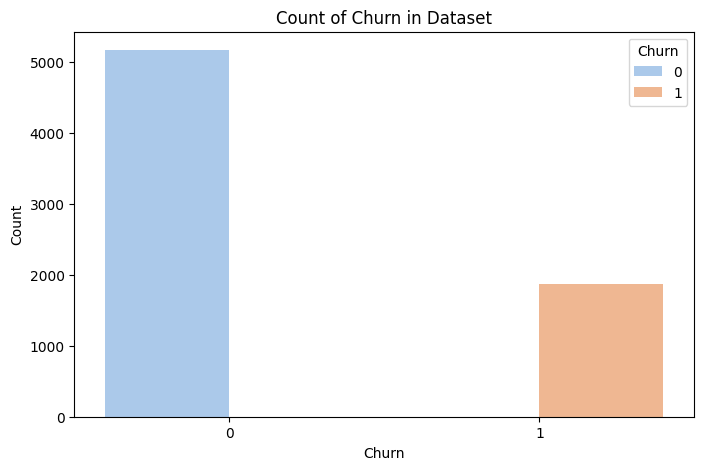

In [12]:
binary_features = [c for c in df.columns if c not in ['tenure','MonthlyCharges','TotalCharges']]

for feature in binary_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, palette='pastel',hue='Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of {feature} in Dataset')
    plt.show()

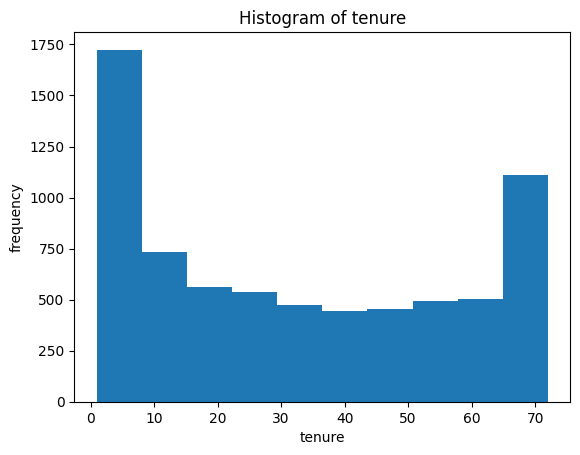

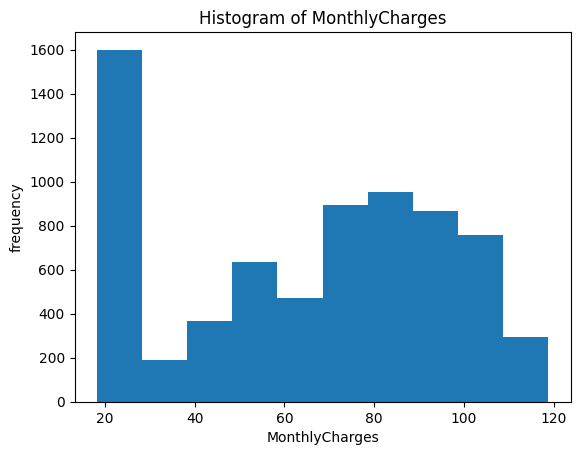

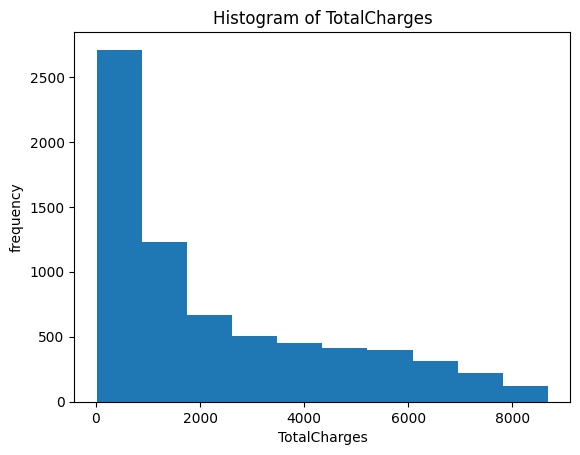

In [13]:
def plot_frequency(col):
    plt.title(f'Histogram of {col}')
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()
plot_frequency('tenure')
plot_frequency('MonthlyCharges')
plot_frequency('TotalCharges')

In [14]:
#normalizing data

cols_to_scale = ['TotalCharges', 'tenure', 'MonthlyCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df'''


'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\ndf[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])\ndf'

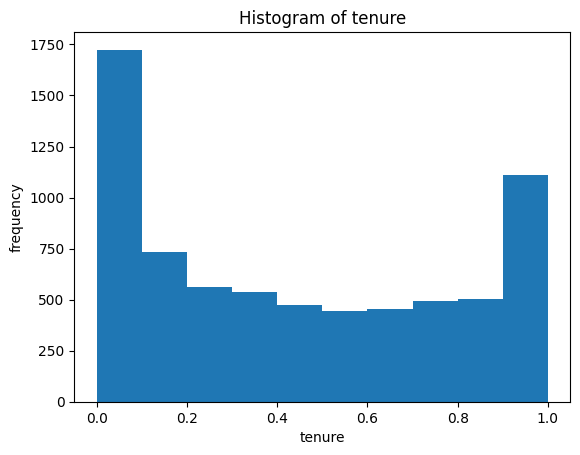

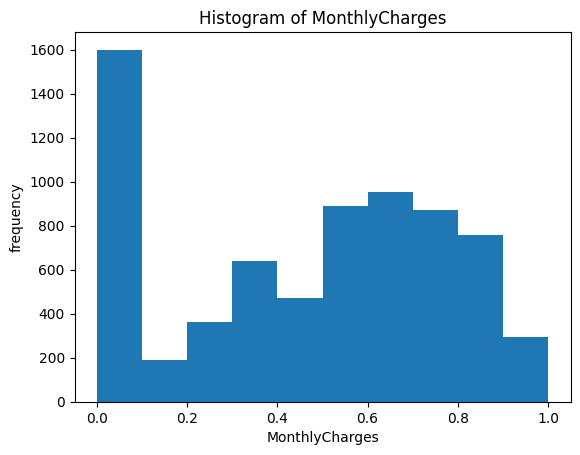

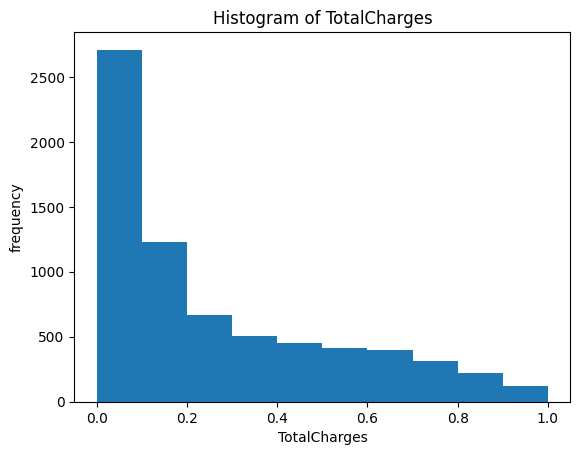

In [15]:
def plot_frequency(col):
    plt.title(f'Histogram of {col}')
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()
plot_frequency('tenure')
plot_frequency('MonthlyCharges')
plot_frequency('TotalCharges')

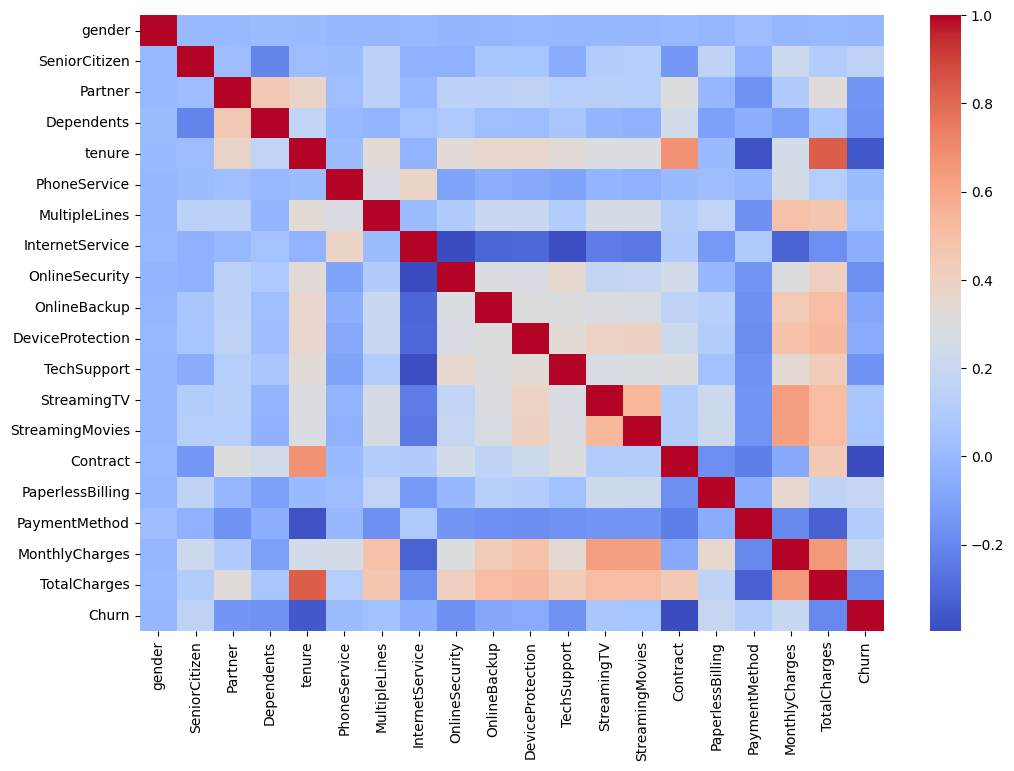

In [16]:
numeric_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

# PCA

In [17]:
cols_to_pca = df.columns.to_list()

pca = PCA(n_components=10)
pca_transformed = pca.fit_transform(df[cols_to_pca])

pca_columns = [f'PCA_{i+1}' for i in range(10)]  # New column names for PCA components
df_pca = pd.DataFrame(pca_transformed, columns=pca_columns)

df = pd.concat([df, df_pca], axis=1)



In [18]:
#sns.pairplot(df, hue='Churn')
#plt.show()

In [19]:
nan_count = df.isna().sum()
nan_count

gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
PCA_1               11
PCA_2               11
PCA_3               11
PCA_4               11
PCA_5               11
PCA_6               11
PCA_7               11
PCA_8               11
PCA_9               11
PCA_10              11
dtype: int64

In [20]:
before_drop = len(df)
new_df = df.dropna()
after_drop = len(new_df)
print(before_drop, after_drop)
df = new_df

7043 7021


In [21]:
X = df.drop(['Churn'],axis = 1)
y = df['Churn']

# Train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = {'model' : [],
           'accuracy' : [],
           'precision' : [],
           'f1 score' : [],
           'recall' : []
           }

In [23]:
def display_confusion_matrix(cm,name):
    plt.title('Heat map of ' + name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('predicted label')
    plt.ylabel('True label')
    plt.show()

def model_metrics(name, model):
    y_pred = model.predict(X_test)

    results['model'].append(name)
    results['accuracy'].append(accuracy_score(y_test, y_pred))
    results['precision'].append(precision_score(y_test, y_pred))
    results['recall'].append(recall_score(y_test, y_pred))
    results['f1 score'].append(f1_score(y_test, y_pred))

    print(classification_report(y_test, y_pred))

    display_confusion_matrix(confusion_matrix(y_test,y_pred), name)

# Models

In [24]:
l_model = LogisticRegression()
l_model.fit(X_train,y_train)


LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1061
         1.0       0.63      0.59      0.61       344

    accuracy                           0.81      1405
   macro avg       0.75      0.74      0.74      1405
weighted avg       0.81      0.81      0.81      1405



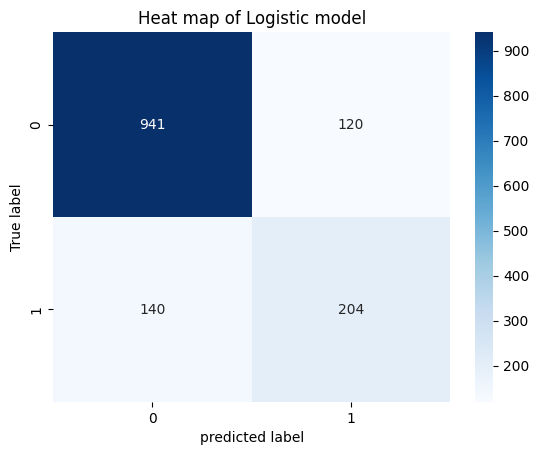

In [25]:
model_metrics('Logistic model', l_model)

In [26]:
rc_model = RidgeClassifier()
rc_model.fit(X_train,y_train)

RidgeClassifier()

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1061
         1.0       0.62      0.53      0.57       344

    accuracy                           0.80      1405
   macro avg       0.74      0.71      0.72      1405
weighted avg       0.80      0.80      0.80      1405



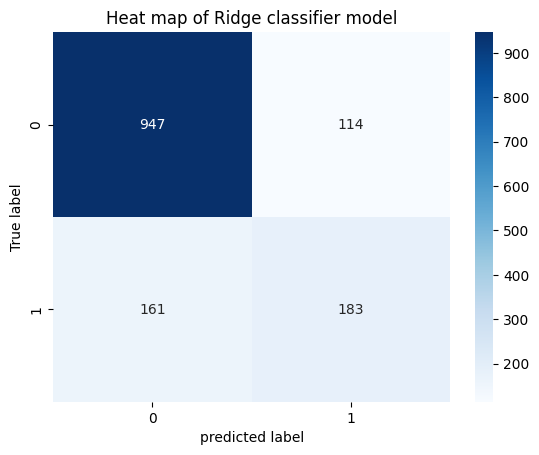

In [27]:
model_metrics('Ridge classifier model', rc_model)

In [28]:
de_model = DecisionTreeClassifier(max_depth=500,criterion='entropy')
de_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=500)

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1061
         1.0       0.48      0.52      0.50       344

    accuracy                           0.74      1405
   macro avg       0.66      0.67      0.66      1405
weighted avg       0.75      0.74      0.75      1405



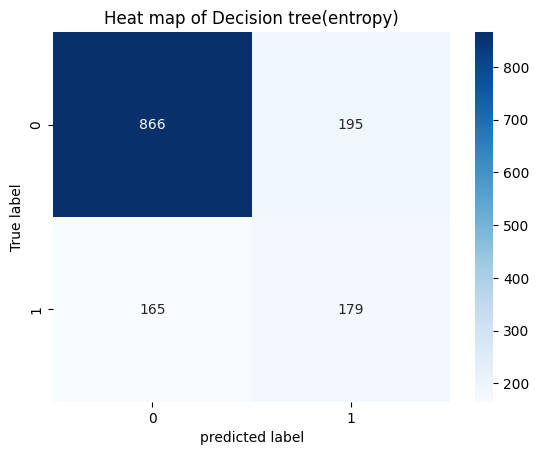

In [29]:
model_metrics('Decision tree(entropy)', de_model)

In [30]:
dg_model = DecisionTreeClassifier(max_depth=500,criterion='gini')
dg_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500)

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      1061
         1.0       0.46      0.48      0.47       344

    accuracy                           0.73      1405
   macro avg       0.64      0.65      0.64      1405
weighted avg       0.74      0.73      0.73      1405



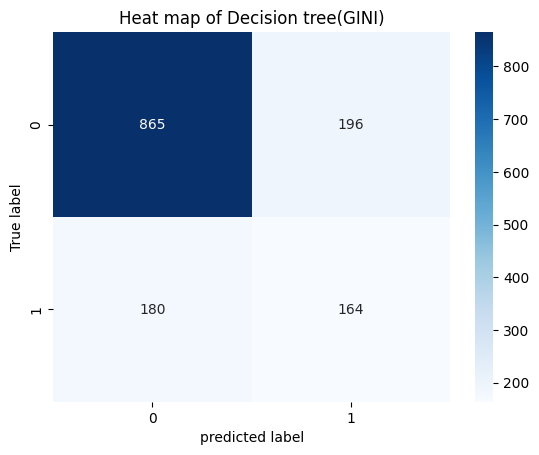

In [31]:
model_metrics('Decision tree(GINI)', dg_model)

In [32]:
rf_e_model = RandomForestClassifier(criterion='entropy',max_depth=500)
rf_e_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=500)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1061
         1.0       0.62      0.52      0.56       344

    accuracy                           0.80      1405
   macro avg       0.73      0.71      0.72      1405
weighted avg       0.79      0.80      0.80      1405



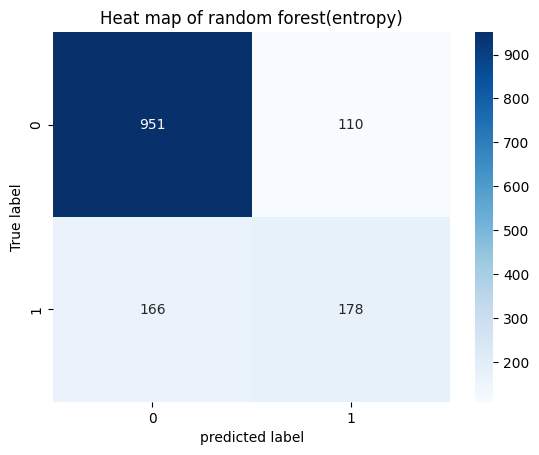

In [33]:
model_metrics('random forest(entropy)', rf_e_model)

In [34]:
rf_g_model = RandomForestClassifier(criterion='gini',max_depth=500)
rf_g_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=500)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1061
         1.0       0.61      0.49      0.54       344

    accuracy                           0.80      1405
   macro avg       0.73      0.69      0.71      1405
weighted avg       0.79      0.80      0.79      1405



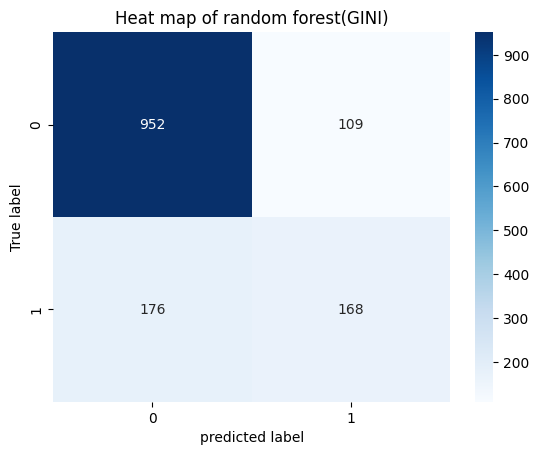

In [35]:
model_metrics('random forest(GINI)', rf_g_model)

In [36]:
s_model = SVC(kernel='rbf',gamma=0.5, C=1.0)
s_model.fit(X_train,y_train)

SVC(gamma=0.5)

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1061
         1.0       0.60      0.35      0.45       344

    accuracy                           0.79      1405
   macro avg       0.71      0.64      0.66      1405
weighted avg       0.76      0.79      0.76      1405



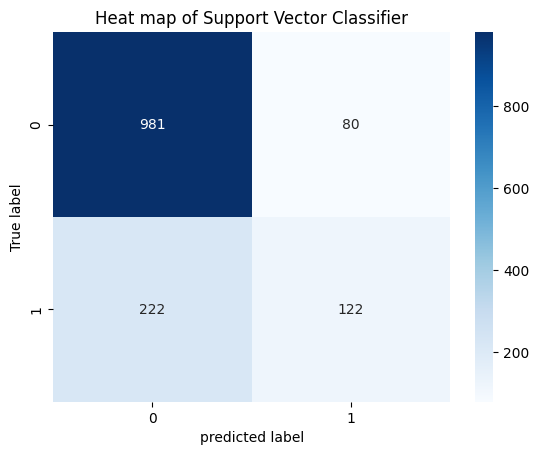

In [37]:
model_metrics('Support Vector Classifier', s_model)

Best k value: 84


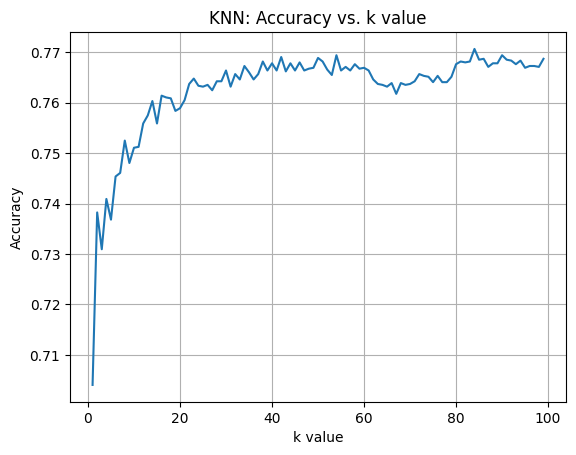

In [38]:
# Trying k from 1 to 100
k_values = range(1, 100)  
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    accuracies.append(scores.mean())

best_k = k_values[np.argmax(accuracies)]
print(f"Best k value: {best_k}")

plt.plot(k_values, accuracies)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. k value')
plt.grid()
plt.show()

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1061
         1.0       0.55      0.56      0.55       344

    accuracy                           0.78      1405
   macro avg       0.70      0.70      0.70      1405
weighted avg       0.78      0.78      0.78      1405



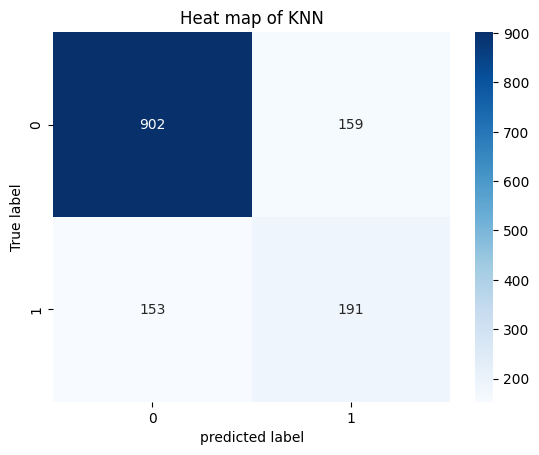

In [40]:
model_metrics('KNN', knn_model)

In [41]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      1061
         1.0       0.48      0.76      0.58       344

    accuracy                           0.74      1405
   macro avg       0.69      0.74      0.70      1405
weighted avg       0.80      0.74      0.75      1405



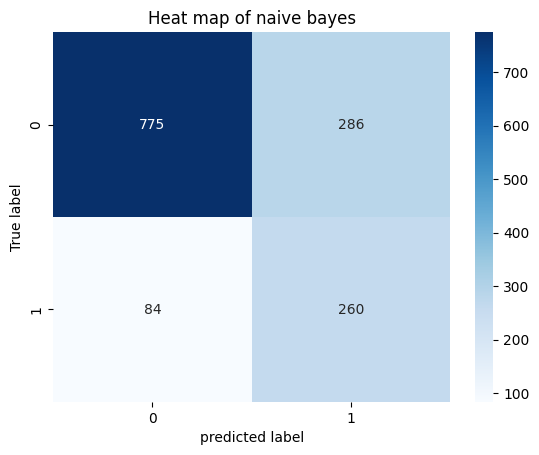

In [42]:
model_metrics('naive bayes', nb_model)

# Results

In [43]:
result = pd.DataFrame(results)
result

,model,accuracy,precision,f1 score,recall
0,Logistic model,0.814947,0.629630,0.610778,0.593023
1,Ridge classifier model,0.804270,0.616162,0.570983,0.531977
2,Decision tree(entropy),0.743772,0.478610,0.498607,0.520349
3,Decision tree(GINI),0.732384,0.455556,0.465909,0.476744
4,random forest(entropy),0.803559,0.618056,0.563291,0.517442
5,random forest(GINI),0.797153,0.606498,0.541063,0.488372
6,Support Vector Classifier,0.785053,0.603960,0.446886,0.354651
7,KNN,0.777936,0.545714,0.550432,0.555233
8,naive bayes,0.736655,0.476190,0.584270,0.755814
